# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train = pd.read_csv(r"train.csv");

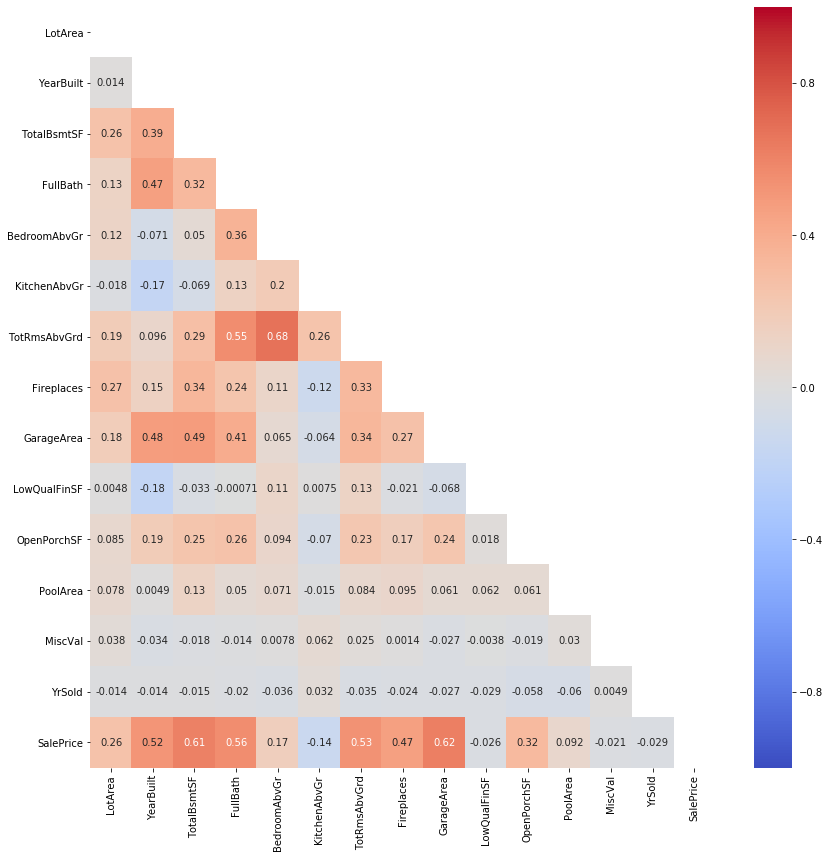

In [3]:
train_subset = train[['LotArea','YearBuilt','TotalBsmtSF','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','LowQualFinSF','OpenPorchSF','PoolArea','MiscVal','YrSold','SalePrice']]

corr  = train_subset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,14))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, mask = mask, vmin=-1)

**As evident from the above heatmap, the most positive correlation(0.68) exists between BedroomAbvGr and TotRmsAbvGrd features which does make sense. A house having more bedroom above grade is also expected to have a higher total rooms above grade as this number also includes the bedrooms. Also, Saleprice and GarageArea have higher positive correlation of 0.62. It suggests that houses having large garage area have larger sale price which does seem obvious. People are very interested in the garage area of the houses as they need to park their vehicles and larger garage area leads to larger interest among the people to but thoses houses.**

**The most negative corrleation(-0.18) exists between YearBuilt and LowQualFinSF features. As expected, newer the house, lesser is it expected to have a low quality finished surface area. on the contrary, houses built a long back are expected to have more low quality surafce area and the heatmap validates it. Similar is the case with KitchenAbvGr and YearBuilt. So, in general, this dataset indicates that newer houses have high quality features while older houses have lower features.**

**A strange thing is observed for the correlation between KitchenAbvGr and SalePrice. They have a negative correlation meaning as the quality of kitchen goes on decreasing, the saleprice increases! In general, it should be the reverse scenario and this might be due to a certain subset of features which seem to influence the correlation.**

## Part 2 - Informative Plots

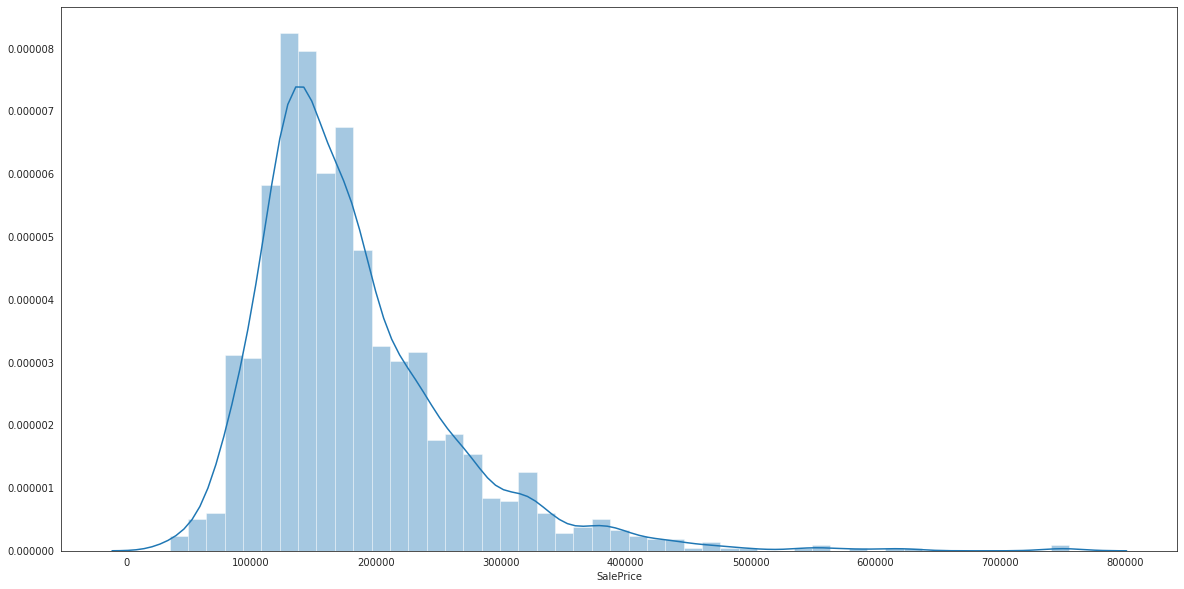

In [9]:
plt.rcParams["figure.figsize"] = [20, 10]
sns.distplot(train['SalePrice']);

**The feature SalePrice deviates from the normal distibution and has considerable positive skewness.It also has some factor of peakedness which means certain houses have a very high sale price when compared to other houses. This skewedness can be reduced by taking the log of values for sale price.**

Text(0.5, 1.0, 'Variation of average house prices over year built')

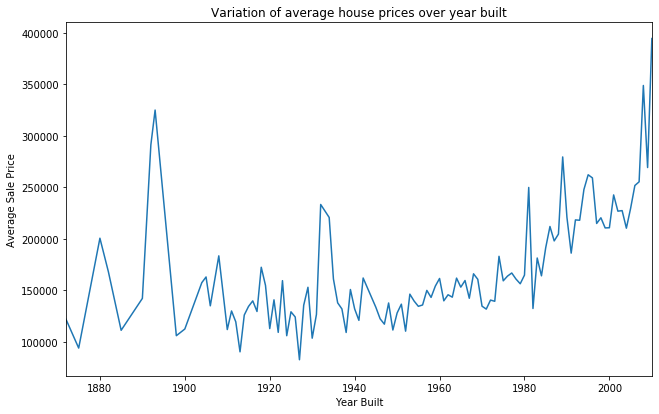

In [8]:
fig, ax = plt.subplots(figsize = (10.5, 6.5))
linegraph = train_subset[['YearBuilt','SalePrice']]
linegraph.groupby(['YearBuilt'])['SalePrice'].mean().plot(ax = ax)
ax.set_xlabel('Year Built')
ax.set_ylabel('Average Sale Price')
ax.set_title('Variation of average house prices over year built')

**In general, the houses which were built recently have a higher average sale price than the older houses. However, there are certain exceptions where even the older houses have a higher sale price as compared to newer ones. This might be due to the fact that these houses have a higher square footage area than those newer ones or they have been recently remodified.**

Text(0.5, 1.0, 'Overall quality wise house count')

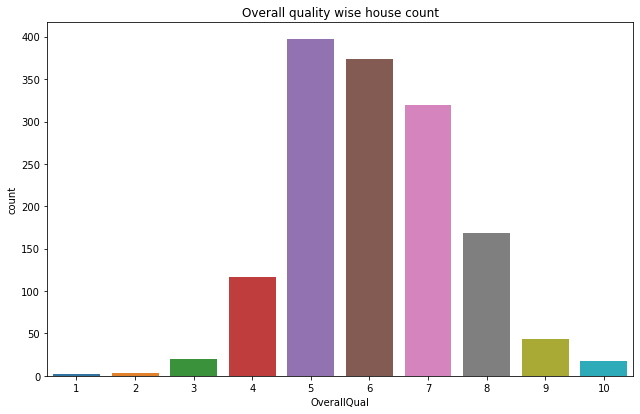

In [10]:
ax = sns.countplot(x="OverallQual", data=train)
ax.set_title('Overall quality wise house count')

**Highest number of houses in the dataset belong to the overall quality of 5 followed by 6 and 7. Almost negligible number of houses have an overall quality of 1. Also, there are are about  20-30 houses that have the highest overall quality of 10 and are expected to be having high sale price.**

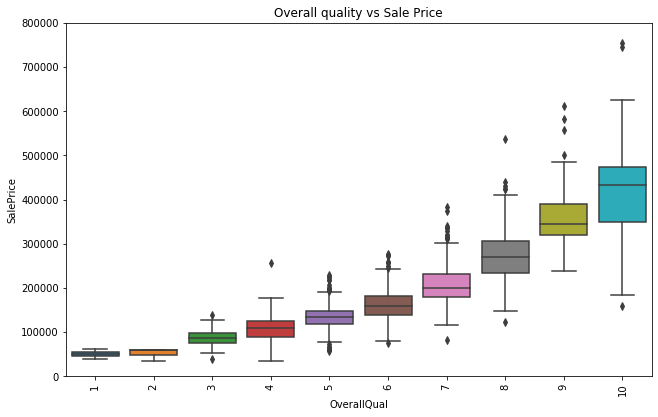

In [12]:
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);
fig.set_title('Overall quality vs Sale Price')
plt.xticks(rotation=90);

**The plot reveals that there is positive correlation between overall quality and sale price as indicated by a slightly upward curve. There seems to be an outlier with grade 4 but having high sale price.**

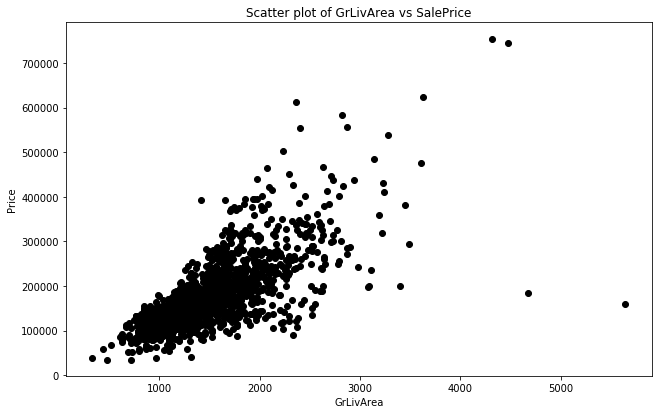

In [16]:
def scatter_plot(feature, target):
    plt.figure(figsize=(10.5, 6.5))
    plt.scatter(
        train[feature],
        train[target],
        c='black'
    )
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title('Scatter plot of ' + feature + ' vs SalePrice')
    plt.show()

scatter_plot('GrLivArea', 'SalePrice')

**There seems to be a linear correlation between the living area above grade and sale price. As the living area increases, the sale price increases which is expected in general.**

Text(0.5, 1.0, 'Housewise count of number of bedrooms')

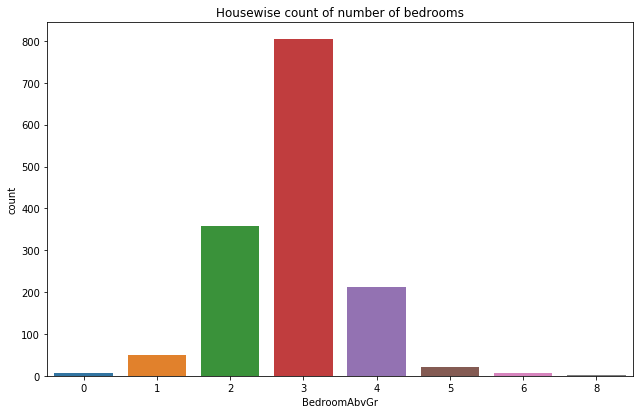

In [20]:
ax = sns.countplot(x="BedroomAbvGr", data=train)
ax.set_title('Housewise count of number of bedrooms')

**Most of the houses in the dataset have 3 bedrooms followed by 2 and 4. This might give some hint about number of people living in a family on an average in the dataset. Very few houses are as big as having 8 bedrooms.**

Text(0.5, 1.0, 'Number of houses in neighborhoods')

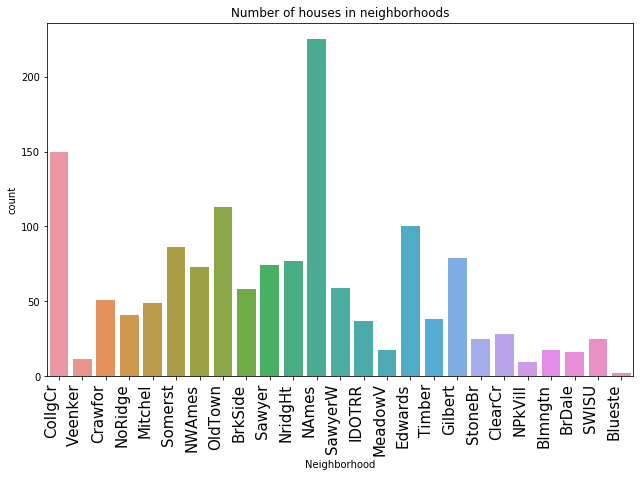

In [21]:
ax = sns.countplot(x="Neighborhood", data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=15)
ax.set_title('Number of houses in neighborhoods')

**he highest number of houses in the dataset belong to the NAmes neighborhood while the least number of houses are from Blueste area.**

## Part 3 - Handcrafted Scoring Function

**For the scoring function, I have considered five features - YearBuilt, OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars
and scored them after seeing their scatter plots against sale price. Following is the scatter plot for each feature and the
scoring scheme below the plot:**

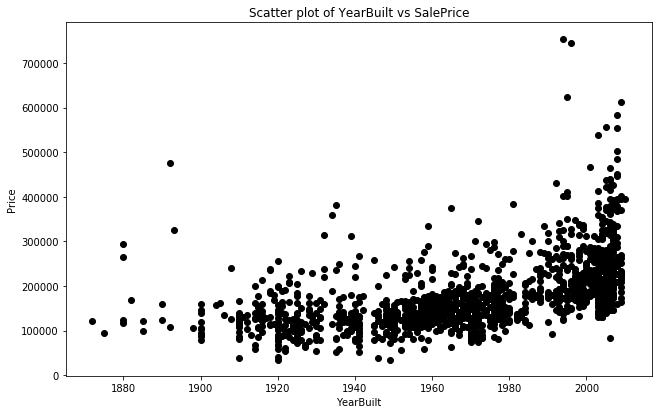

In [22]:
scatter_plot('YearBuilt', 'SalePrice')

| Year Range | Points Scored |
| --- | --- |
|1880-1900|1|
|1901-1960|2|
|1961-1980|3|
|1981-2000|5|
|2001-2010|7|

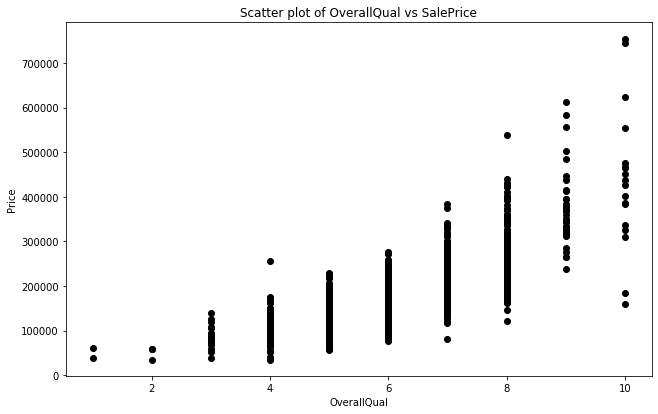

In [23]:
scatter_plot('OverallQual', 'SalePrice')

|Overall Quality|Points Scored|
| --- | --- |
|1-2|1|
|3|2|
|4|3|
|5|4|
|6|5|
|7|6|
|8|7|
|9-10|8|

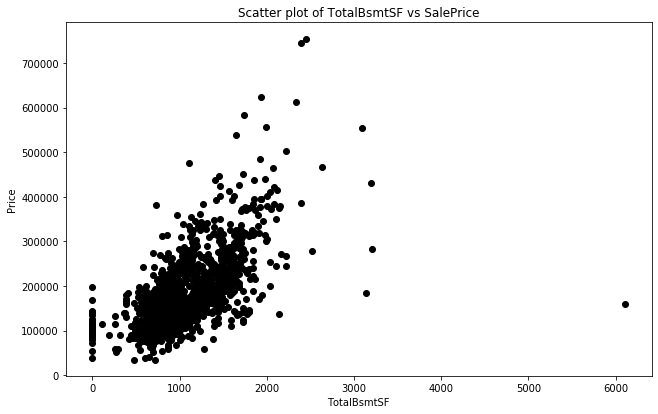

In [24]:
scatter_plot('TotalBsmtSF', 'SalePrice')

|TotalBsmtSF Range|Points Scored|
| --- | --- |
|0-500|1|
|501-1000|3|
|1001-1500|4|
|1501-2000|6|
|2001-2800|7|
|801-3500|4|
|3501-6110|1|

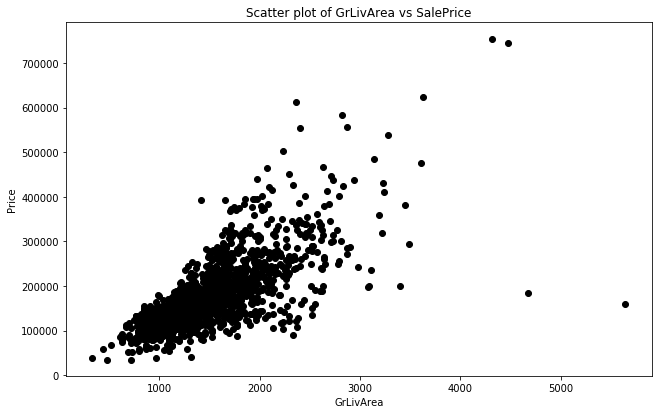

In [25]:
scatter_plot('GrLivArea', 'SalePrice')

|GrLivArea Range|Points Scored|
| --- | --- |
|0-500:1|
|501-1000|3|
|1001-1500|4|
|1501-2000|6|
|2001-3000|7|
|3001-4000|8|
|4001-5000|9|
|5001-5642|4|

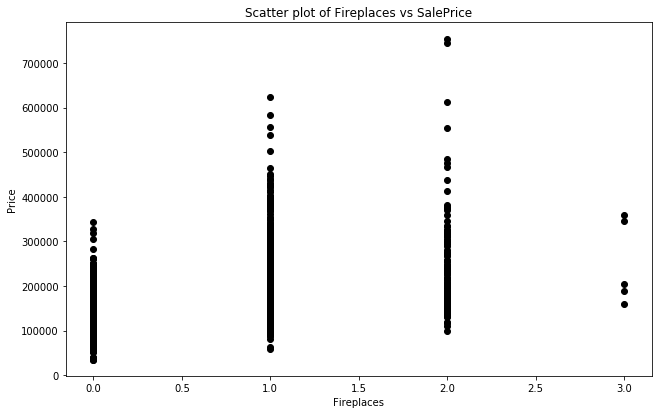

In [26]:
scatter_plot('Fireplaces', 'SalePrice')

|Fireplaces|Points Scored|
| --- | --- |
|0|1|
|1-2|2|
|3|1|

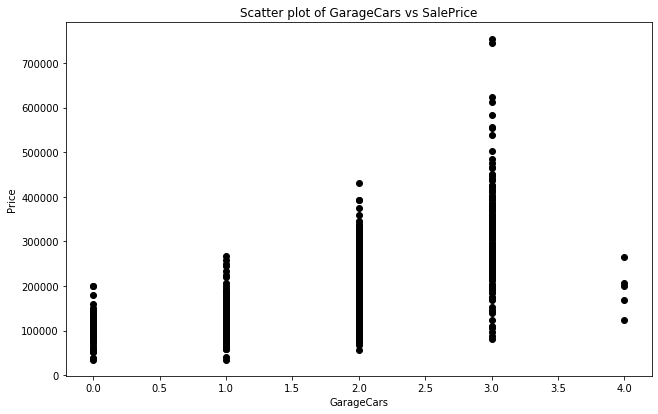

In [27]:
scatter_plot('GarageCars', 'SalePrice')

|GarageCars|Points Scored|
| --- | --- |
|0|1|
|1|2|
|2|4|
|3|6|
|4|2|

In [22]:
#Functions to assign scores for each feature as per above scheme

def getOverallQualScore(value):
    map = {
     1:1,
     2:1,
     3:2,
     4:3,
     5:4,
     6:5,
     7:6,
     8:7,
     9:8,
     10:8
    }
    return map[value]

def getFireplacesScore(value):
    map = {
        0:1,
        1:2,
        2:2,
        3:1
    }
    return map[value]

def getGarageCarsScore(value):
    map = {
        0:1,
        1:2,
        2:4,
        3:6,
        4:2
    }
    return map[value]

def getYearBuiltScore(value):
    if 1880 <= value <= 1900:
        return 1
    elif 1901 <= value <= 1960:
        return 2
    elif 1961 <= value <= 1980:
        return 3
    elif 1981 <= value <= 2000:
        return 5
    elif 2001 <= value <= 2010:
        return 7
    else:
        return 1
    
def getTotalBsmtSFScore(value):
    if 0 <= value <= 500:
        return 1
    elif 501 <= value <= 1000:
        return 3
    elif 1001 <= value <= 1500:
        return 4
    elif 1501 <= value <= 2000:
        return 6
    elif 2001 <= value <= 2800:
        return 7
    elif 2801 <= value <= 3500:
        return 4
    elif 3501 <= value <= 6110:
        return 1
    else:
        return 1

def getGrLivAreaScore(value):
    if 0 <= value <= 500:
        return 1
    elif 501 <= value <= 1000:
        return 3
    elif 1001 <= value <= 1500:
        return 4
    elif 1501 <= value <= 2000:
        return 6
    elif 2001 <= value <= 3000:
        return 7
    elif 3001 <= value <= 4000:
        return 8
    elif 4001 <= value <= 5000:
        return 9
    elif 5001 <= value <= 5642:
        return 4
    else:
        return 1
    


In [23]:
train_score = train[['Id','OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','Fireplaces','GarageCars']]

train_score['Score'] = train_score.apply(lambda x: getOverallQualScore(x['OverallQual']) + getFireplacesScore(x['Fireplaces']) + getGarageCarsScore(x['GarageCars']) + getYearBuiltScore(x['YearBuilt']) + getTotalBsmtSFScore(x['TotalBsmtSF']) + getGrLivAreaScore(x['GrLivArea']), axis=1)     

In [24]:
train_score = train_score.sort_values('Score')

train_score.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,Score
533,534,1,1946,0,334,0,0,7
1100,1101,2,1920,290,438,0,1,8
916,917,2,1949,480,480,0,1,8
636,637,2,1936,264,800,1,0,10
710,711,3,1935,270,729,0,0,10
375,376,1,1922,683,904,0,0,11
1218,1219,4,1947,0,912,0,0,11
520,521,4,1900,0,1294,0,0,11
976,977,4,1923,440,869,0,0,11
1323,1324,4,1940,420,708,0,0,11


**The above 10 houses have been ranked the lowest by the scoring function meaning they are least desirable as per the scoring
function.**

In [25]:
train_score.tail(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,Score
1373,1374,10,2001,2633,2633,2,3,37
477,478,9,2006,2153,2643,1,3,37
1182,1183,10,1996,2396,4476,2,3,37
691,692,10,1994,2444,4316,2,3,37
515,516,10,2009,2006,2020,1,3,37
278,279,9,2006,2121,2121,1,3,37
1267,1268,9,2008,2002,2018,1,3,37
224,225,10,2003,2392,2392,1,3,37
1243,1244,10,2006,2076,2076,1,3,37
898,899,9,2009,2330,2364,2,3,37


**The above 10 houses have been ranked the highest by the scoring function meaning they are most desirable as per the scoring
function. We can see all the recently build houses among the top 10 while bottom 10 houses have been built a long time back.**

In [26]:
train = train.sort_values('SalePrice')

train_score['Id'].head(10).isin(train['Id'].head(10))

533      True
1100    False
916      True
636     False
710      True
375     False
1218    False
520     False
976     False
1323    False
Name: Id, dtype: bool

**As we can see, among the 10 least desirable houses in the dataset, the scoring function gives least score to only 3 of them. Rest 7 houses ranked lowest by the scoring function do not feature in the original dataset among the cheapest houses.**

In [27]:
train_score['Id'].head(10).isin(train['Id'].head(30))

533      True
1100     True
916      True
636      True
710      True
375      True
1218    False
520     False
976     False
1323    False
Name: Id, dtype: bool

**The performance of scoring function improves if we increase the range of houses to be considered. Among the 30 cheapest houses in the dataset, the scoring function correctly scores 6 houses with least score. This might be due to the fact that we have only considered a few features to score and they might have less overall effect on sale price.**

In [28]:
train_score['Id'].tail(10).isin(train['Id'].tail(10))

1373    False
477     False
1182     True
691      True
515     False
278     False
1267    False
224     False
1243    False
898      True
Name: Id, dtype: bool

**The scoring function correctly identifies 3 houses among the original dataset as the costliest.**

In [29]:
train_score['Id'].tail(10).isin(train['Id'].tail(30))

1373     True
477     False
1182     True
691      True
515      True
278      True
1267    False
224     False
1243     True
898      True
Name: Id, dtype: bool

**If we increase the range of our consideration, the function scores 7 houses as costliest which actually are among the top 30
costliest houses.**

**To summarise, the scoring function identifies costliest houses more accurately than the cheapest houses. It performs especially badly when one of the features of a house has a lesser value but is complimented by a higher value for other feature. For eg, a house built in 1947 and having 912 units living area has been ranked same as another house built in 1900 but having 1294 units of living area. In ideal case, since there is a considerable difference in the year in which the houses were built, we expect their prices to differ considerably too. This also indicates that the scoring function measures all features as equal but in general scenario, one of the feature has more effect on the sale price than the other feature.**

## Part 4 - Pairwise Distance Function

**For calculating the pairwise distance, I have considered and calculated what we call as the Mahalanobis distance. It is the distance between a point (vector) and a distribution and is considered to be an effective multivariate distance metric.
Euclidean distance will work fine as long as the dimensions are equally weighted and are independent of each other.
Mahalanobis distance considers the corrleation between the features, which is typically the case in real-world datasets. The Euclidean distance between a point and the center of the points (distribution) can give little or misleading information about how close a point really is to the cluster.**

**For the sake of simplicity, I have taken only four features - OverallQual, TotalBsmtSF, GrLivArea, GarageCars to calculate the distance. I have also used the above features to get new ones and also included them in the distance calculation.**

In [62]:
import scipy as sp
from scipy.stats import chi2

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [63]:
df_x = train[['Id', 'OverallQual','TotalBsmtSF','GrLivArea','GarageCars']]

df_x['GrLivArea'] = np.log(df_x['GrLivArea'])
df_x['HasBsmt'] = pd.Series(len(df_x['TotalBsmtSF']), index=df_x.index)
df_x['HasBsmt'] = 0 
df_x.loc[df_x['TotalBsmtSF']>0,'HasBsmt'] = 1
df_x.loc[df_x['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_x['TotalBsmtSF'])

In [64]:
df_x.head()

,Id,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,HasBsmt
0,1,7,6.752270,7.444249,2,1
1,2,6,7.140453,7.140453,2,1
2,3,7,6.824374,7.487734,2,1
3,4,7,6.628041,7.448334,3,1
4,5,8,7.043160,7.695303,3,1


In [65]:
df_x['Distance'] = mahalanobis(x=df_x, data=df_x)
df_x['p_value'] = 1 - chi2.cdf(df_x['Distance'], 6)

In [66]:
df_x.head(5)

,Id,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,HasBsmt,Distance,p_value
0,1,7,6.752270,7.444249,2,1,4.345563,0.630021
1,2,6,7.140453,7.140453,2,1,4.047831,0.670204
2,3,7,6.824374,7.487734,2,1,4.064973,0.667884
3,4,7,6.628041,7.448334,3,1,9.020960,0.172403
4,5,8,7.043160,7.695303,3,1,6.578776,0.361562


**The p-value here calculates the significance of a dataset row with respect to the entire data distibution. For better
visualisation, we will delete the rows having a significance value < 0.01**

In [67]:
indexNames = df_x[ df_x['p_value'] < 0.01 ].index

# Delete these row indexes from dataFrame
df_x.drop(indexNames , inplace=True)

#Concatenate the distance column to our original dataset for comparisons
train_subset = train[['Id','LotArea',
 'YearBuilt',
 'TotalBsmtSF',
 'FullBath',
 'GrLivArea',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'SalePrice',
 'Neighborhood']]

train_subset['Distance'] = train_subset.Id.map(df_x.set_index('Id')['Distance'].to_dict())
train_subset = train_subset[pd.notnull(train_subset['Distance'])]
train_subset = train_subset.sort_values('Distance')

In [68]:
train_subset.head(10)

,Id,LotArea,YearBuilt,TotalBsmtSF,FullBath,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Neighborhood,Distance
715,716,10140,1974,1064,2,1350,1,7,478,165000,NWAmes,0.333498
853,854,12095,1964,1127,1,1445,1,7,645,158000,NAmes,0.407685
810,811,10140,1974,1040,1,1309,1,5,484,181000,NWAmes,0.425235
580,581,14585,1960,1144,1,1429,1,7,572,181900,NAmes,0.505076
881,882,13758,1990,1156,2,1717,1,7,400,187500,Timber,0.624135
675,676,2289,1978,855,2,1441,1,7,440,148500,NPkVill,0.654064
919,920,11029,1958,1184,1,1414,1,6,601,176500,NAmes,0.662895
684,685,16770,1998,1195,2,1839,1,7,486,221000,NoRidge,0.682277
546,547,8737,1923,1065,1,1635,1,6,440,210000,BrkSide,0.703647
949,950,9360,1972,1161,1,1381,1,5,676,197500,NWAmes,0.708109


**As we can see, the function does quite well in assigning distance by taking into account only 4 features in calculation. The function also seems to catch the similarity between the other features even if they are not included in the calculation.(Eg. yearBuilt, LotArea, etc). Also, we can see that the given similar distance by the function have almost similar sale price.**

In [69]:
train_subset = train_subset.sort_values('GrLivArea')

In [70]:
train_subset.head(10)

,Id,LotArea,YearBuilt,TotalBsmtSF,FullBath,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Neighborhood,Distance
916,917,9000,1949,480,0,480,1,4,308,35311,IDOTRR,15.180667
29,30,6324,1927,520,1,520,1,4,240,68500,BrkSide,13.366934
528,529,9098,1920,528,1,605,1,5,0,86000,Edwards,9.372254
696,697,6000,1921,616,1,616,1,4,205,89000,BrkSide,7.848080
434,435,1890,1972,630,1,630,1,3,0,81000,MeadowV,8.699607
614,615,1491,1972,630,1,630,1,3,0,75500,MeadowV,8.332306
1449,1450,1533,1970,630,1,630,1,3,0,92000,MeadowV,13.885214
649,650,1936,1970,630,1,630,1,3,0,84500,MeadowV,8.303375
1039,1040,1477,1970,630,1,630,1,3,286,80000,MeadowV,6.959929
489,490,1526,1970,630,1,630,1,3,286,86000,MeadowV,6.781551


**We can again reverify that the function works decently if we compare living area of houses. Although the houses have same living area, they are distanced apart as their other features vary in values. Thus, the function seems to cover the covriance between the features.**

## Part 5 - Clustering

In [71]:
from sklearn.cluster import KMeans

#Using only Distance for clustering
df_cluster = train_subset['Distance'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=8).fit(df_cluster)
centroids = kmeans.cluster_centers_

#Appending the clusters identified above with original dataframe
train_subset.loc[:,'clusters'] = kmeans.labels_

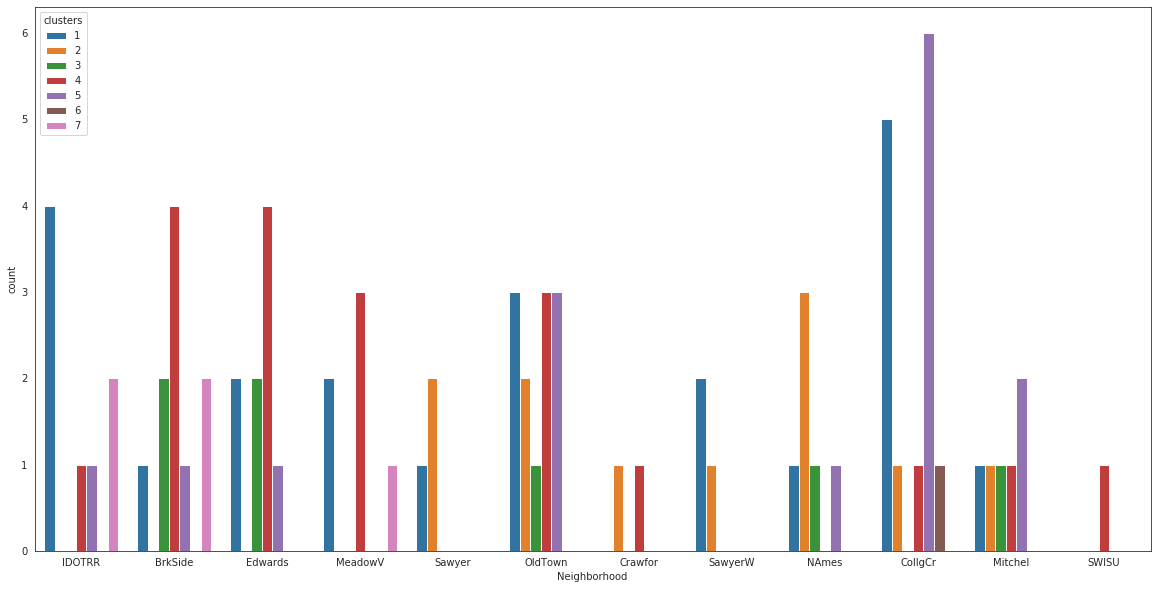

In [72]:
plt.rcParams["figure.figsize"] = [20, 10]
ax = sns.countplot(x="Neighborhood", hue="clusters", data=train_subset.head(80))

**If we consider clustering by distance column, then it doesn't seem to capture the neighborhoods very well. From the graph, we can see that almost all neighborhoods except SWISU are distributed along all the clusters. Even for the neighborhood SWISU, it does seem to get a single cluster 6(colored in red), but the same cluster also contains other neighborhoods like Edwards, BrkSide, MeadowV, OldTown and many others. So we can say that clustering doesn't put houses from same neighborhoods into a single cluster.**

Text(0.5, 0, 'Distance')

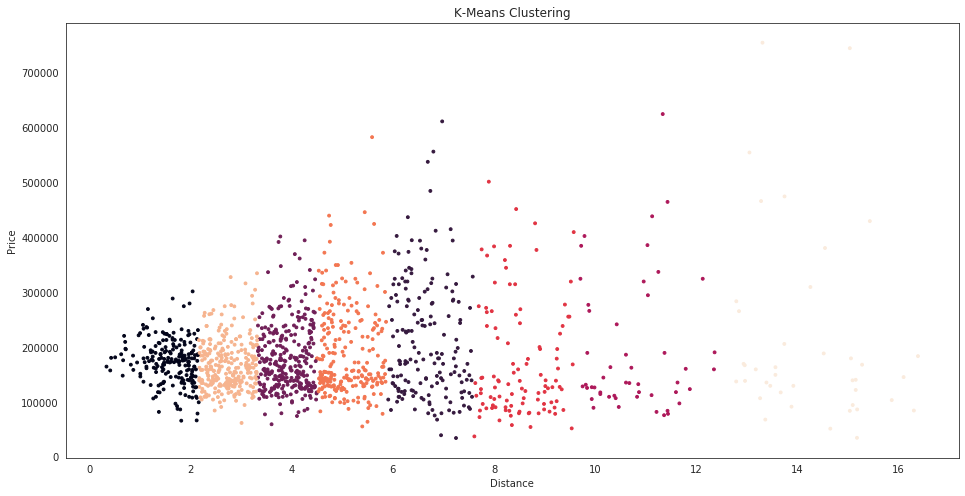

In [74]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(train_subset['Distance'], train_subset['SalePrice'], c=kmeans.labels_.astype(float),s=8)
ax.set_title('K-Means Clustering')
ax.set_ylabel('Price')
ax.set_xlabel('Distance')

**The scatter plot of Distance vs Price also shows that for a particular price, houses are scattered along all the clusters which means the distance column can't be used as a parameter for guessing the house price.**

## Part 6 - Linear Regression

*For setting up the linear regression we will use a subset of 10 features to predict the sale price**

In [10]:
train_lr = train[['GrLivArea','LotArea',
 'YearBuilt',
 'TotalBsmtSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'OpenPorchSF',
 'SalePrice']]

#Adding new features, normalising living area feature and taking log of target variable
train_lr['GrLivArea'] = np.log(train_lr['GrLivArea'])
train_lr['HasBsmt'] = pd.Series(len(train_lr['TotalBsmtSF']), index=train_lr.index)
train_lr['HasBsmt'] = 0 
train_lr.loc[train_lr['TotalBsmtSF']>0,'HasBsmt'] = 1
train_lr['SalePrice'] = np.log(train_lr['SalePrice'])
train_lr.loc[train_lr['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_lr['TotalBsmtSF'])

/home/vishalksarda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/vishalksarda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/vishalksarda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_lr = train_lr.values[:,0:10]
y_lr = train_lr.values[:,10]

#Splitting the training data into a 70:30 ratio of traning and testing data
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr,test_size=0.30, random_state=12345)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

linearRegressor = LinearRegression()
linearRegressor.fit(X_train_std, y_train)
yPrediction = linearRegressor.predict(X_test_std)

print('The rmse of prediction is:', mean_squared_error(y_test, yPrediction) ** 0.5)

The rmse of prediction is: 0.17970576641328745


**The LinearRegression regressor does a decent job of predicting sale prices with RMSE of 0.179 without adding any significant number of features**

Text(0.5, 1.0, 'Predictions vs Real Values')

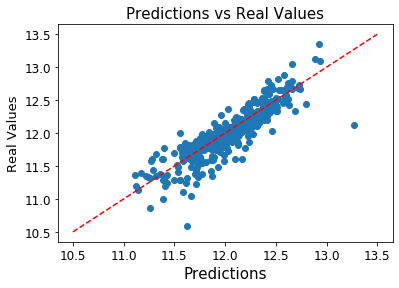

In [12]:
plt.scatter(yPrediction, y_test)
plt.plot([10.5, 13.5], [10.5, 13.5], '--r')
plt.xlabel('Predictions', size=15)
plt.ylabel('Real Values', size=13)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.title('Predictions vs Real Values', size=15)

**For getting the most important feature, we will use plot_importance from XGBoost regressor.**

/home/vishalksarda/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/vishalksarda/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:17:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The rmse of prediction is: 0.0016168852139520002


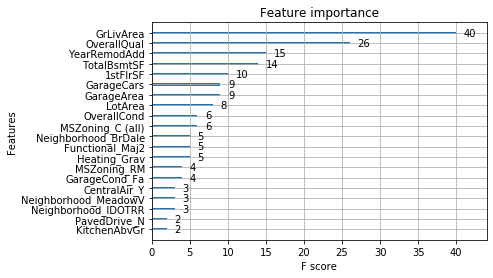

In [28]:
import xgboost
from xgboost import plot_importance

train_dataset = train
cat_cols = list(train_dataset.select_dtypes(include=['object']).columns)
feature_cols = [col for col in train_dataset.columns if col not in ['SalePrice','Id']]
numerical_cols = [col for col in train_dataset.columns if col not in cat_cols and col not in ['Id'] ]

#log transform skewed numeric features:
log_transform_cols = train_dataset[numerical_cols].dtypes[train.dtypes != "object"].index
train_dataset[log_transform_cols] = np.log1p(train_dataset[log_transform_cols])

nan_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Alley','MasVnrType','BsmtQual','BsmtQual','BsmtCond','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish']

def ConverNaNToNAString(data, columnList):
    for x in columnList:       
        data[x] =str(data[x])              
            
#Converting NAN values to string for modeling
ConverNaNToNAString(train_dataset, nan_cols)

train_dataset = pd.get_dummies(train_dataset,columns = cat_cols)

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=5000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

every_column_except_y= [col for col in train_dataset.columns if col not in ['SalePrice','Id']]
model.fit(train_dataset[every_column_except_y],train_dataset['SalePrice'])

yPrediction = model.predict(train_dataset[every_column_except_y])

print('The rmse of prediction is:', mean_squared_error(train_dataset['SalePrice'], yPrediction) ** 0.5)

model.feature_names = every_column_except_y
plot_importance(model, max_num_features=20)

**Thus from the plot above, the most important feature seems to be GrLivArea followed by OverallQual

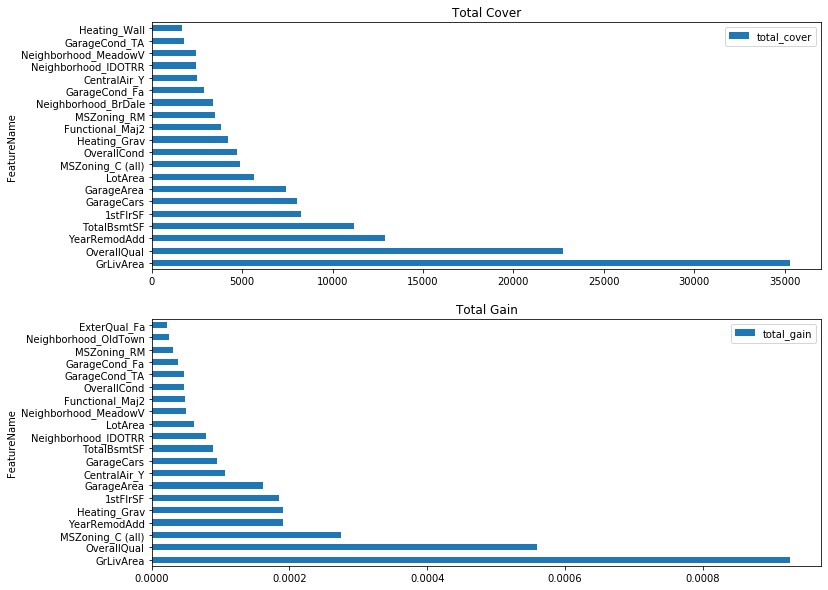

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,10))
f = "total_cover"
get_gain = model.get_booster().get_score(importance_type = f)
sorted_d = sorted(get_gain.items(), key = lambda x:x[1], reverse=True)
gain_df = pd.DataFrame(sorted_d,columns=["FeatureName", f])
gain_df.set_index("FeatureName", inplace=True)
gain_df.head(20).plot.barh(ax=ax1, title="Total Cover")

f = "total_gain"
get_gain = model.get_booster().get_score(importance_type = f)
sorted_d = sorted(get_gain.items(), key = lambda x:x[1], reverse=True)
gain_df = pd.DataFrame(sorted_d,columns=["FeatureName", f])
gain_df.set_index("FeatureName", inplace=True)
gain_df.head(20).plot.barh(ax=ax2, title="Total Gain")

**If we consider the metrics total cover and total gain, again GrLivArea is the most important feature followed by OverallQual**

## Part 7 - External Dataset

**I came up with 2 external datasets - one having US mortgage rates over the years and other having GDP of Ames over the years. Since mortgage rates at a particular time can affect the sale prices of houses sold at that time, this dataset does seem worthy of doing experiment. Also, we can expect that as GDP increases, the sale price for the houses can increase as the purchasing power of people increases.**

**Links for downloading the datasets:
Mortgage data - https://fred.stlouisfed.org/series/MORTGAGE30US
GDP data - https://fred.stlouisfed.org/series/RGMP11180
**

In [28]:
import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv(r"train.csv");
test = pd.read_csv(r"test.csv");

#External dataset having mortgage rates for US
mortgage = pd.read_csv(r"MORTGAGE30US.csv");

#External dataset having GDP for Ames,IA
gdp = pd.read_csv(r"RGMP11180.csv");

In [2]:
gdp.head()

,DATE,RGMP11180
0,2001-01-01,3193
1,2002-01-01,3180
2,2003-01-01,3237
3,2004-01-01,3350
4,2005-01-01,3400


In [3]:
mortgage.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


**Data PreProcessing**

In [29]:
#Extracting year from external datasets
gdp['date'] = pd.to_datetime(gdp['DATE'])
gdp['year'] = gdp['date'].dt.year
gdp = gdp.drop(['DATE', 'date'], axis=1)

mortgage['date'] = pd.to_datetime(mortgage['DATE'])
mortgage['year'] = mortgage['date'].dt.year
mortgage = mortgage.drop(['DATE', 'date'], axis=1)

In [30]:
#Renaming feature names
gdp = gdp.rename(columns={"RGMP11180": "GDP"})
mortgage = mortgage.rename(columns={"MORTGAGE30US": "MortgageRate"})
avgMortgRate = mortgage.groupby('year').mean()
avgMortgRate.add_suffix('Avg').reset_index()

,year,MortgageRateAvg
0,1971,7.541750
1,1972,7.383269
2,1973,8.044808
3,1974,9.187115
4,1975,9.047115
5,1976,8.865849
6,1977,8.845192
7,1978,9.641731
8,1979,11.203654
9,1980,13.742115


In [6]:
gdp.head()

,GDP,year
0,3193,2001
1,3180,2002
2,3237,2003
3,3350,2004
4,3400,2005


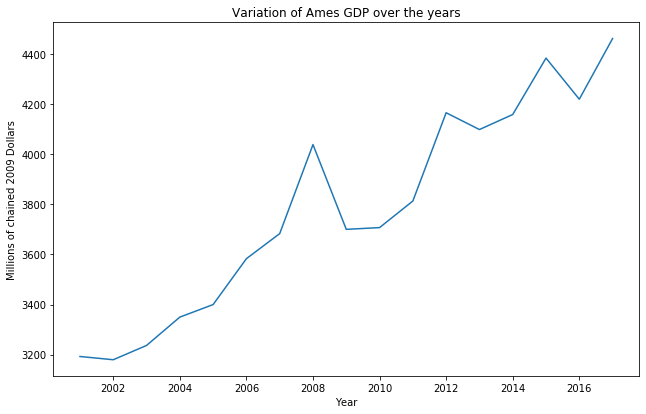

In [32]:
plt.rcParams["figure.figsize"] = [10.5, 6.5]
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Millions of chained 2009 Dollars');
ax.set_title('Variation of Ames GDP over the years')
ax.plot(gdp['year'], gdp['GDP'])

**As we can see, for the external dataset, the average GDP in Ames goes on increasing with increase in the year**

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Percent');
ax.plot(avgMortgRate['year'], avgMortgRate['MortgageRateAvg'])

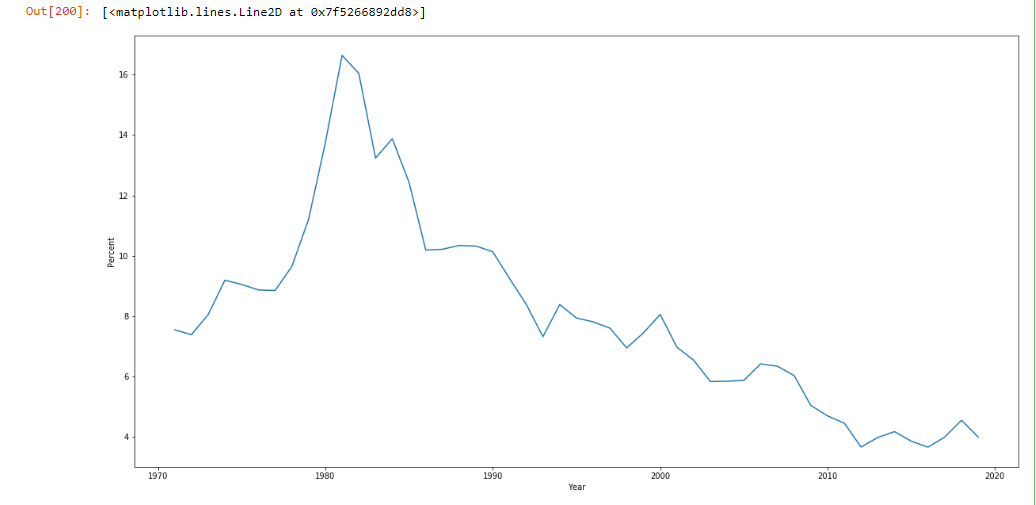

**As we can see, for the external dataset, the mortgage rate in US goes on decreasing as years pass by**

In [8]:
#Merging housing dataset with mortgage dataset
train_merge = pd.merge(train, avgMortgRate, left_on=['YrSold'], right_on = ['year'], how='left')
train_merge[['MoSold','YrSold','MortgageRate']].head()

,MoSold,YrSold,MortgageRate
0,2,2008,6.027170
1,5,2007,6.337308
2,9,2008,6.027170
3,2,2006,6.413269
4,12,2008,6.027170


In [9]:
#Merging housing dataset with gdp dataset
train_merge = pd.merge(train_merge, gdp, left_on=['YrSold'], right_on = ['year'], how='left')
train_merge = train_merge.drop(['year'], axis=1)
train_merge[['MoSold','YrSold','MortgageRate','GDP']].head()

,MoSold,YrSold,MortgageRate,GDP
0,2,2008,6.027170,4038
1,5,2007,6.337308,3683
2,9,2008,6.027170,4038
3,2,2006,6.413269,3583
4,12,2008,6.027170,4038


In [10]:
train.shape

(1460, 81)

In [11]:
train_merge.shape

(1460, 83)

**Modeling**

**Since we need to compare if modelling is affected if we merge the datasets, we will take similar subset of features for both- one having 10 features and other having these 10 as well as newly added 2 features MortgageRate and GDP. To maintain equality, we will do same data prcoessing on both the dataframes.**

In [12]:
train_lr = train[['GrLivArea','LotArea',
 'YearBuilt',
 'TotalBsmtSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'OpenPorchSF',
 'SalePrice']]
train_lr['GrLivArea'] = np.log(train_lr['GrLivArea'])
train_lr['HasBsmt'] = pd.Series(len(train_lr['TotalBsmtSF']), index=train_lr.index)
train_lr['HasBsmt'] = 0 
train_lr.loc[train_lr['TotalBsmtSF']>0,'HasBsmt'] = 1
train_lr['SalePrice'] = np.log(train_lr['SalePrice'])
train_lr.loc[train_lr['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_lr['TotalBsmtSF'])



train_merge_lr = train_merge[['GrLivArea','LotArea',
 'YearBuilt',
 'TotalBsmtSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'OpenPorchSF',
 'MortgageRate',
 'GDP',
 'SalePrice']]
train_merge_lr['GrLivArea'] = np.log(train_merge_lr['GrLivArea'])
train_merge_lr['HasBsmt'] = pd.Series(len(train_merge_lr['TotalBsmtSF']), index=train_merge_lr.index)
train_merge_lr['HasBsmt'] = 0 
train_merge_lr.loc[train_merge_lr['TotalBsmtSF']>0,'HasBsmt'] = 1
train_merge_lr['SalePrice'] = np.log(train_merge_lr['SalePrice'])
train_merge_lr.loc[train_merge_lr['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_merge_lr['TotalBsmtSF'])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_lr = train_lr.values[:,0:10]
y_lr = train_lr.values[:,10]

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr,test_size=0.30, random_state=12345)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

linearRegressor = LinearRegression()
linearRegressor.fit(X_train_std, y_train)
yPrediction = linearRegressor.predict(X_test_std)
rmse =  mean_squared_error(y_test, yPrediction) ** 0.5

print('The rmse of prediction for original dataset is: ',str(rmse))

The rmse of prediction for original dataset is:  0.17970576641328748


In [14]:
X_lr = train_merge_lr.values[:,0:12]
y_lr = train_merge_lr.values[:,12]

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr,test_size=0.30, random_state=12345)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

linearRegressor = LinearRegression()
linearRegressor.fit(X_train_std, y_train)
yPrediction = linearRegressor.predict(X_test_std)
rmse_merged =  mean_squared_error(y_test, yPrediction) ** 0.5

print('The rmse of prediction for merged dataset is: ', rmse_merged)

The rmse of prediction for merged dataset is:  0.1796021972615678


In [15]:
print('Change in rmse after merging external datasets: ', (rmse - rmse_merged))

Change in rmse after merging external datasets:  0.00010356915171969017


**As we can see, the addition of 2 features does seem to improve the modelling(using LinearRegressor particularly) by a very small margin by reducing the error. Since we have added only one feature each from those datasets, it can be further experimented to add more features from different but relevant datasets. Also, since we have not taken into account the month in which the house was sold, it might also have some effect in further reducing the error when matched with the month in which the house was sold.**

## Part 8 - Permutation Test

**I have used 10 features - LotArea, TotalBsmtSF, YearBuilt, GrLivArea, GarageYrBlt, MasVnrArea, LowQualFinSF, Fireplaces, PoolArea, MiscVal and calculated their permutation and p-vaue scores with Linear Regression.**

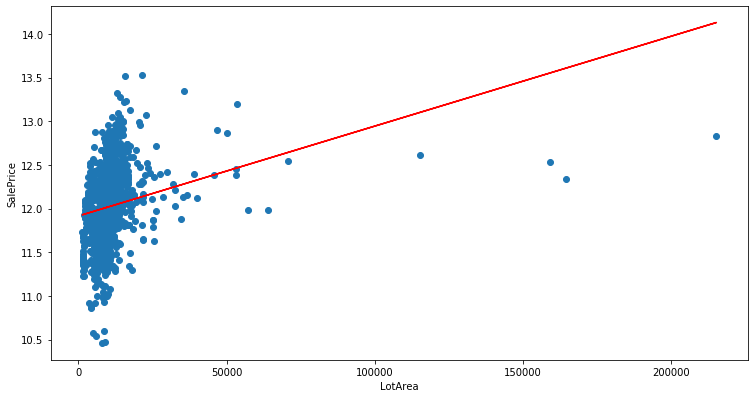

RMSE on linear regression for LotArea: 0.3858686218584302
Classification score 0.04482729622032727 (pvalue : 0.009900990099009901)


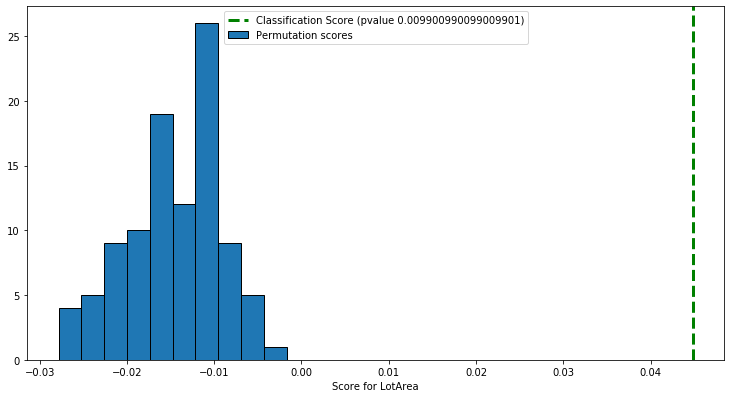

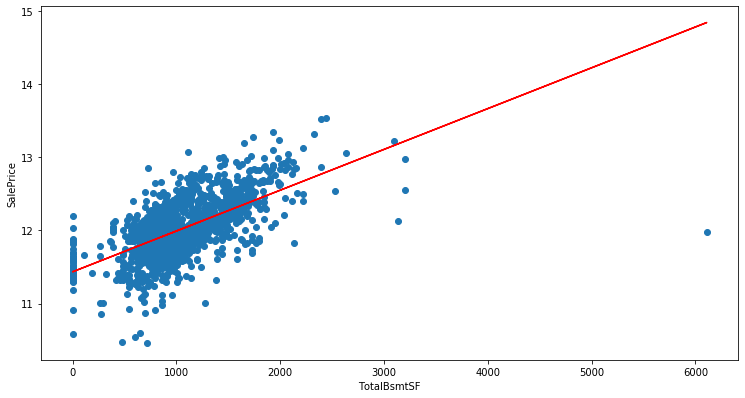

RMSE on linear regression for TotalBsmtSF: 0.3157599972660214
Classification score 0.34490226417316605 (pvalue : 0.009900990099009901)


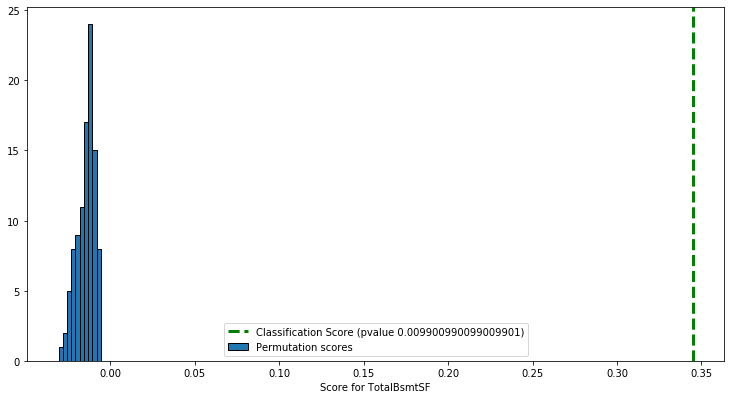

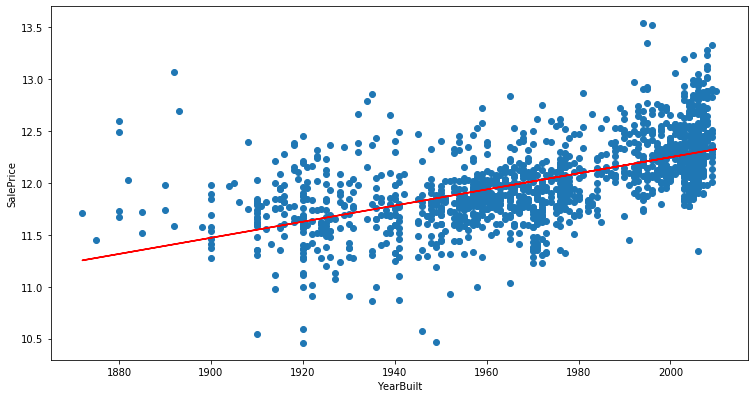

RMSE on linear regression for YearBuilt: 0.3234046009688375
Classification score 0.3297612306121431 (pvalue : 0.009900990099009901)


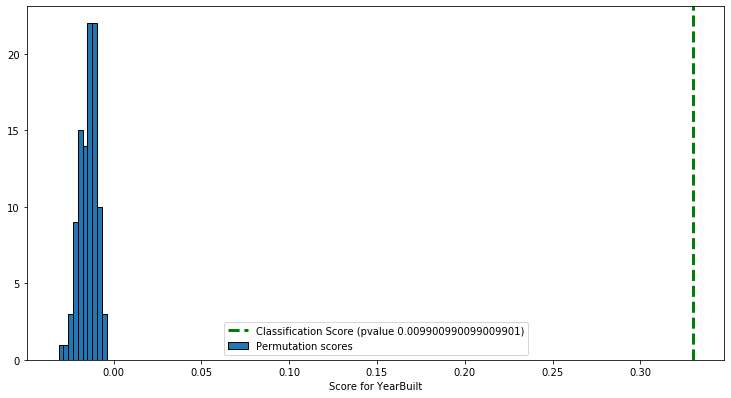

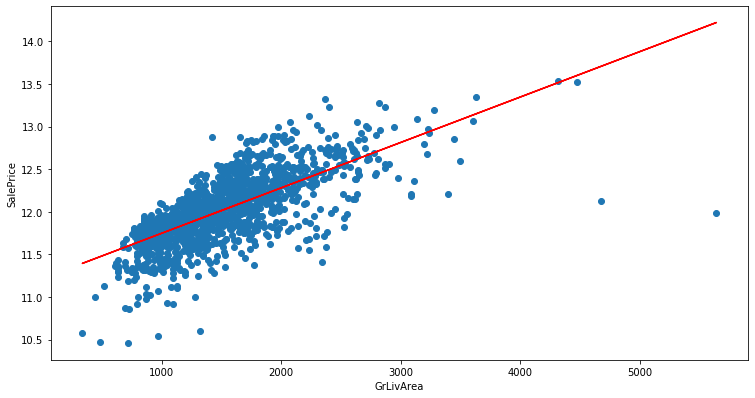

RMSE on linear regression for GrLivArea: 0.28480481267301105
Classification score 0.46474542970180505 (pvalue : 0.009900990099009901)


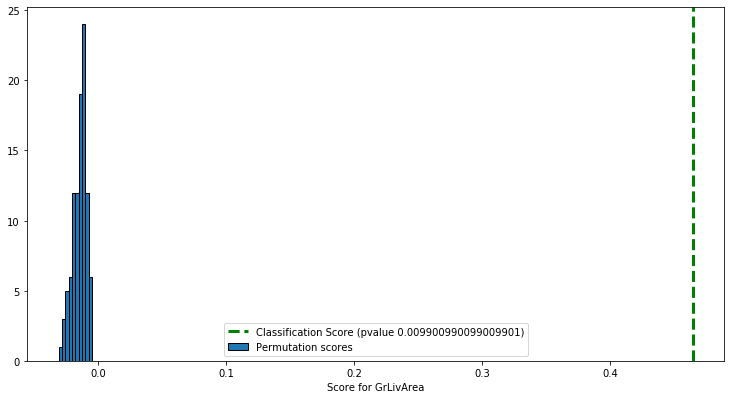

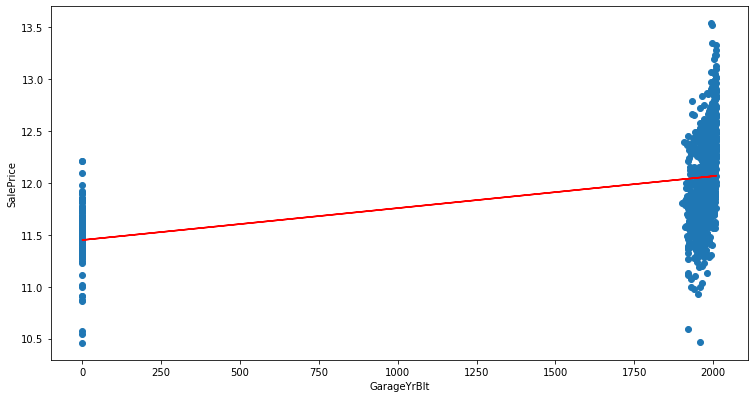

RMSE on linear regression for GarageYrBlt: 0.37420517885662125
Classification score 0.1076785549164403 (pvalue : 0.009900990099009901)


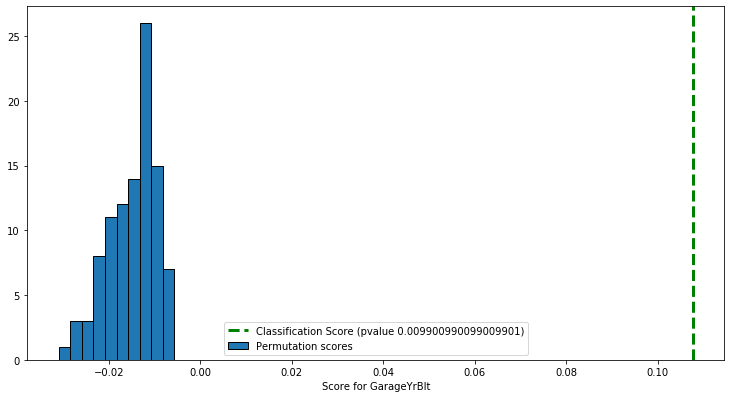

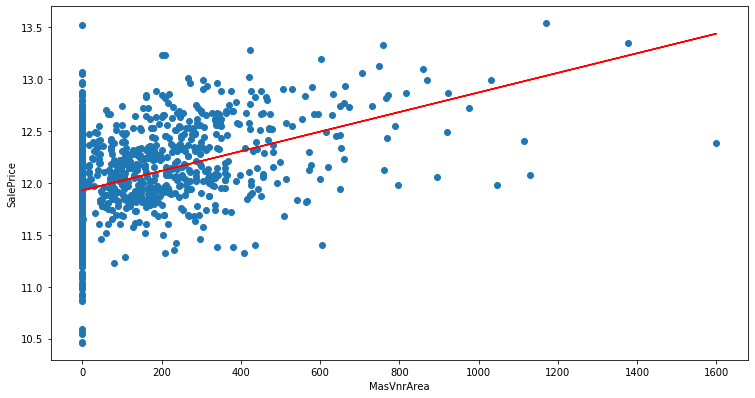

RMSE on linear regression for MasVnrArea: 0.36112366710772925
Classification score 0.17020190412748543 (pvalue : 0.009900990099009901)


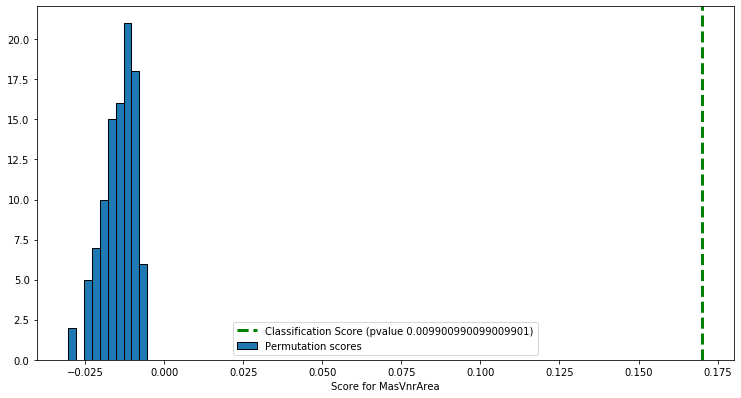

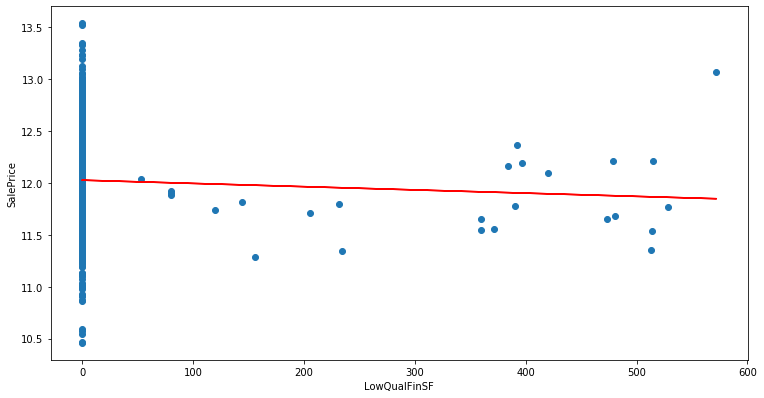

RMSE on linear regression for LowQualFinSF: 0.3990272011820817
Classification score -0.007617036353778898 (pvalue : 0.06930693069306931)


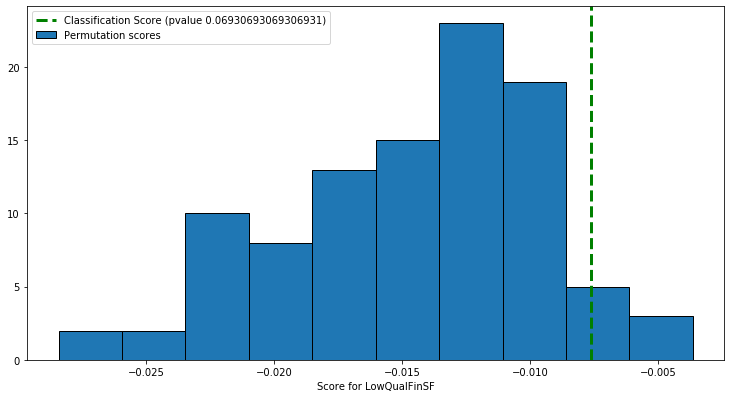

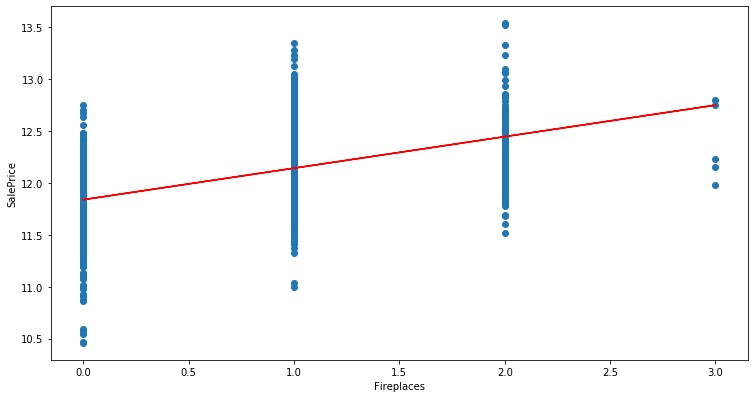

RMSE on linear regression for Fireplaces: 0.3482153722049505
Classification score 0.22387305256567303 (pvalue : 0.009900990099009901)


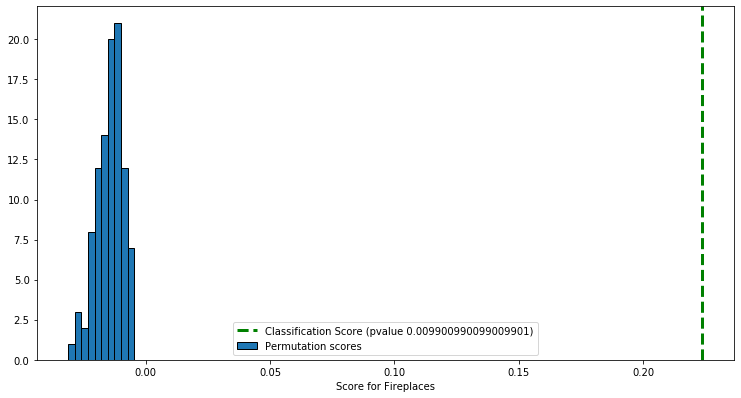

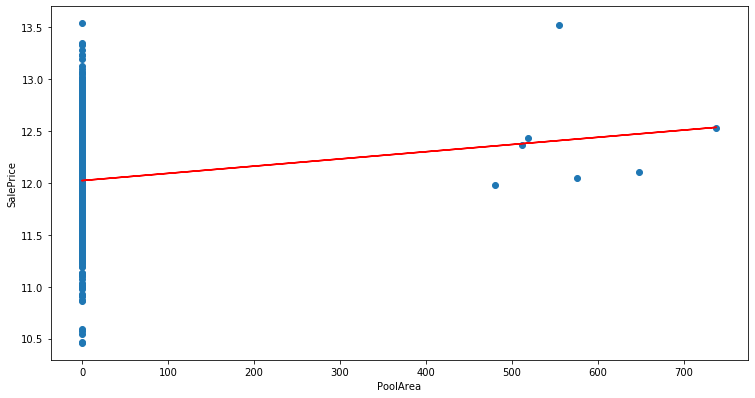

RMSE on linear regression for PoolArea: 0.39834118040321675
Classification score -0.005275377427305685 (pvalue : 0.039603960396039604)


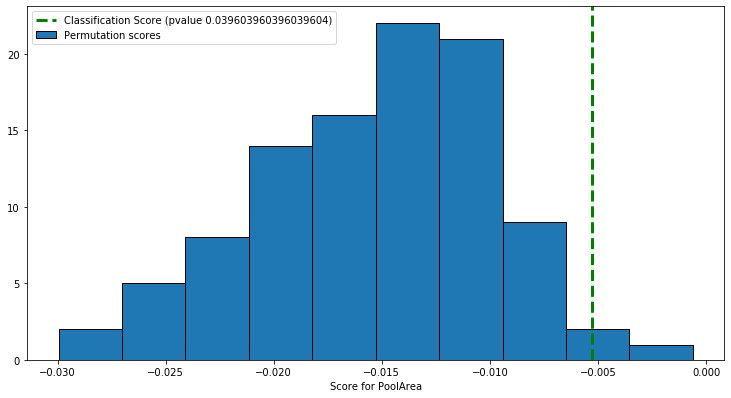

In [35]:
from sklearn.model_selection import permutation_test_score

train_perm = train[['SalePrice', 'LotArea', 'TotalBsmtSF', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'MasVnrArea', 'LowQualFinSF', 'Fireplaces', 'PoolArea', 'MiscVal']]
train_perm['SalePrice'] = np.log(train_perm['SalePrice'])
train_perm = train_perm.fillna(0)

kfolds = KFold(n_splits=18, shuffle=True, random_state=42)
plt.rcParams["figure.figsize"] = [12.5, 6.5]

from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i in range(1,10):
    Y = train_perm.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    X = train_perm.iloc[:, i].values.reshape(-1, 1) 
    plt.xlabel(list(train_perm.columns.values)[i])
    plt.ylabel(list(train_perm.columns.values)[0])
    linear_regressor = LinearRegression()
    linear_regressor.fit(X,Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    rms = np.sqrt(mean_squared_error(Y, Y_pred))
    print("RMSE on linear regression for " + list(train_perm.columns.values)[i] + ': ' + str(rms))

    score, permutation_scores, pvalue = permutation_test_score(linear_regressor, X, Y, cv=kfolds, n_permutations=100, n_jobs=1, scoring='r2')
    print("Classification score %s (pvalue : %s)" % (score, pvalue))
    plt.hist(permutation_scores, 10, label='Permutation scores',edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score], ylim, '--g', linewidth=3, label='Classification Score'' (pvalue %s)' % pvalue)

    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score for ' + list(train_perm.columns.values)[i])
    plt.show()

**As seen from the above plots, all the features except LowQualFinSF and PoolArea have a very low p-value close to 0.0099 which indicates that they are significant and have some effect on the sale price. The classification score for these features is also positive meaning they can be used in our regressor function. LowQualFinSF and PoolArea have a higher value 0.069 and 0.039 respectively which indicates that they are not that significant and probably may be discarded during predicting sale prices to reduce noise. The classification scores for these features is also negative meaning they do a very bad job in predicting house prices. This test thus can be used in feature selection task while building model.**

## Part 9 - Final Result

In [48]:
import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

print('Loading train and test data...')

train = pd.read_csv(r"train.csv");
test = pd.read_csv(r"test.csv");

train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

#removing outlier
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

#log of target to remove skewness
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train['SalePrice'].reset_index(drop = True)

train_features = train.drop(['SalePrice'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop = True)

print('Data loaded')

Loading train and test data...
Data loaded


# Data Preprocessing

**Filling categorical columns having NA values with none**

In [49]:
print('Filling categorical columns having NA values with none...')

objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))

Filling categorical columns having NA values with none...


**Filling categorical columns having NA values with 0**

In [50]:
print('Filling categorical columns having NA values with 0...')

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

Filling categorical columns having NA values with 0...


**Normalizing highly skewed features by boxcox transformation**

In [51]:
print('Normalizing highly skewed features by boxcox transformation...')
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.7]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))
    
print('Data preprocessing done')

Normalizing highly skewed features by boxcox transformation...
Data preprocessing done


# Feature Engineering

**Combining features to generate new features**

In [52]:
print('Combining features to generate new features...')

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

features['YrBltAndRemod'] = features['YearBuilt'] + features['YearRemodAdd']
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.7 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.3 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

features = features.drop(['YearRemodAdd', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
features = features.drop(['PoolArea', 'Fireplaces'], axis=1)

final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

print('Feature engineering done')

Combining features to generate new features...
Feature engineering done


# Data Cleaning

**Removing outliers**

In [53]:
print('Removing outliers...')
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

Removing outliers...


**Dropping features where 99% of values are zeroes**

In [54]:
print('Dropping features where 99% of values are zeroes...')
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_sub = X_sub.drop(overfit, axis=1)

print('Data cleaning done')

Dropping features where 99% of values are zeroes...
Data cleaning done


# Model Building

In [55]:
print('Building model...')
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))  

svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0004,))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.03, max_depth=4, max_features='sqrt', min_samples_leaf=20, min_samples_split=10, loss='huber', random_state =42)                             

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.005, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=4060,
                                     max_depth=4, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00005)

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

#Store models, scores and prediction values 
models = {'Ridge': ridge,
          'Lasso': lasso, 
          'ElasticNet': elasticnet,
          'SVR': svr,
          'GBR': gbr,
          'LightGBM': lightgbm,
          'XGBoost': xgboost}
scores = {}

#Evaluating model score
print('Evaluating model scores...')
for name, model in models.items():    
    score = cv_rmse(model)
    print((name + ": {:.4f} ({:.4f})\n").format(score.mean(), score.std()))
    scores[name] = (score.mean(), score.std())
    
print('Done evaluating')

print('Fitting models...')

print('Fitting StackingRegressor...')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('Fitting ElasticNet...')
elastic_model_full_data = elasticnet.fit(X, y)

print('Fitting Lasso...')
lasso_model_full_data = lasso.fit(X, y)

print('Fitting Ridge...')
ridge_model_full_data = ridge.fit(X, y)

print('Fitting SVR...')
svr_model_full_data = svr.fit(X, y)

print('Fitting GradientBoosting...')
gbr_model_full_data = gbr.fit(X, y)

print('Fitting XGBoost...')
xgb_model_full_data = xgboost.fit(X, y)

print('Fitting LightGBM...')
lgb_model_full_data = lightgbm.fit(X, y)

print('Done fitting all models')

#Blending model predictions
print('Blending model predictions...')
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

rmsle_score = rmsle(y, blend_models_predict(X))
print('RMSLE score on train data:' + str(rmsle_score))
scores['Blender'] = (rmsle_score.mean(), rmsle_score.std())


print('Generating prediction file...')
submission = pd.read_csv(r"sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))
submission.to_csv("new_submission.csv", index=False)
print('Predictions generated')

Building model...
Evaluating model scores...
Ridge: 0.1019 (0.0143)

Lasso: 0.1022 (0.0155)

ElasticNet: 0.1021 (0.0154)

SVR: 0.1023 (0.0135)

GBR: 0.1071 (0.0144)

LightGBM: 0.1058 (0.0153)

[16:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:39] WARNING: /workspace/src/objective/

# Model performance visualisation

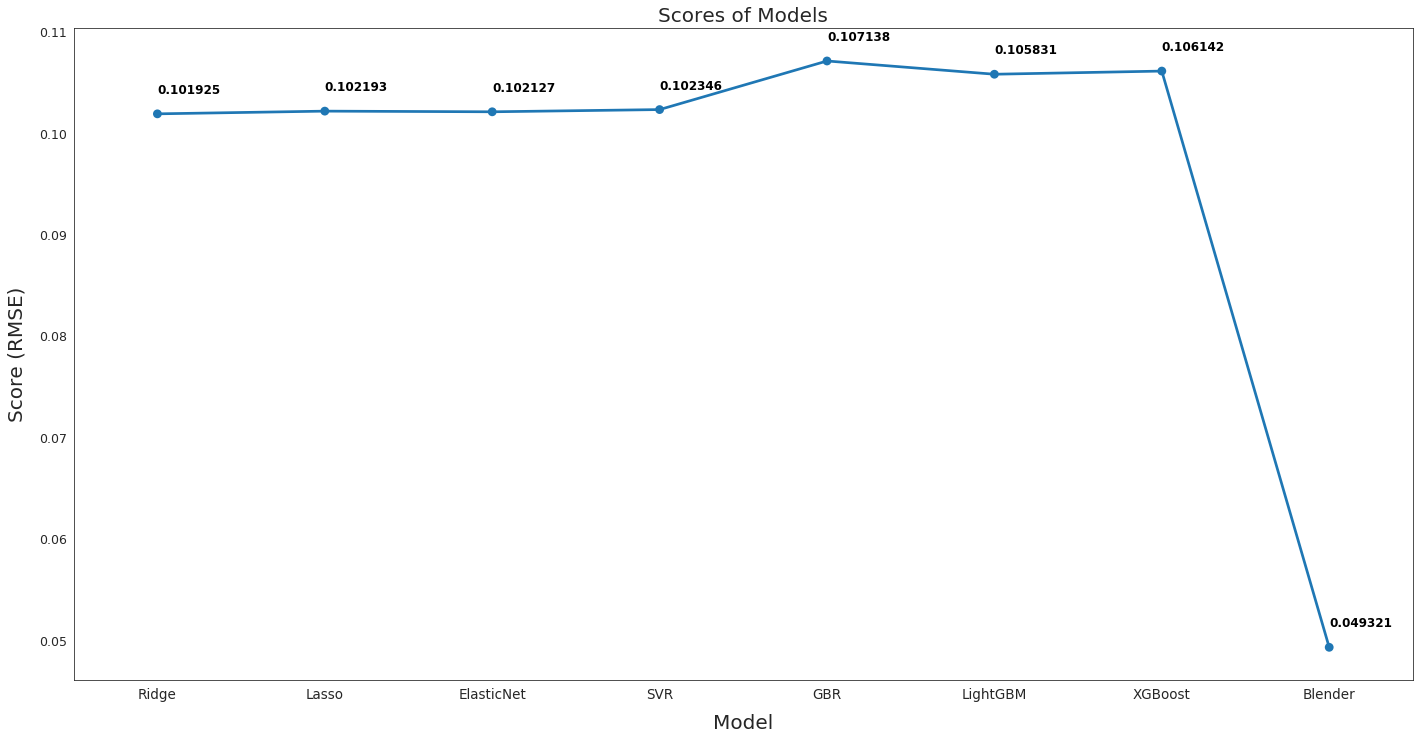

In [56]:
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

**As we can see from the graph, the RMSE score of blended models(also called as ensembling) is far better than the individual models. The models seem to complement each other and give a good RMSE value. I tried first with only Ridge(0.1019), Lasso(0.1021) and ElasticNet(0.1021) but found that there individual scores were not so good as compared to when combined together. I then considered the average of the models for prediction.This approach gave me an improved RMSE of 0.07. I then decided to include more models like LigtGBM and XGBoost among others in ensembling scheme and take their average. This approach, instead of improving the score, did inverse and gave me RMSE of 1.2. After some research, I found that some kind of weightage scheme is necessary instead of considering all the models with same weights. This approach also gave me different scores based on weights given to individual models. As Ridge and Lasso were the most accuarate ones, I tried giving them more weight as compared to others but this shot up the RMSE to 4.6. I then followed a method of trial and error usinf meta learning to see which weights suit the best for ensembling. Since I have combined 2 or more features to get a new one(Eg. Total_Bathrooms = FullBath + 0.7 * HalfBath + BsmtFullBath + 0.3 * BsmtHalfBath), I tried removing the ones that I used to get new features. This does gave me an improved score of 0.059 but after retaining those features, RMSE got improved to 0.0466. Removing skewed features and normalizing them using boxcox transformation helped a lot. Also, the dataset seems to have quite a few outliers which greatly affect the model predictions are necessary to be removed to have an improvement.**

**In another attempt to keep the modelling simple, I used the averages of only 2 regressors - Lasso and StackingCVRegressor and got RMSE of 0.051 which is not that bad keeping in mind the simplicity of model.**

References for model ensembling:
https://medium.com/weightsandbiases/an-introduction-to-model-ensembling-63effc2ca4b3
https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/
https://en.wikipedia.org/wiki/Ensemble_averaging_(machine_learning)
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/51274

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/sardavk12

Highest Rank: 268

Score: 0.11443

Number of entries: 8

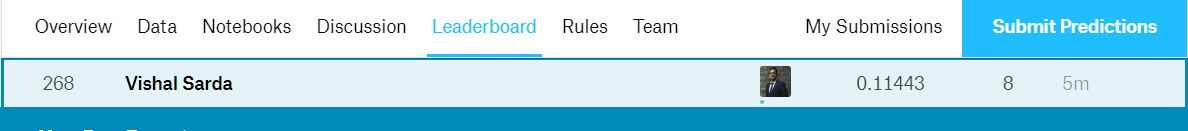